# Word embeddings (word2vec)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

## Cargo un modelo pre-entrenado con el spanish billion words corpus
### Cristian Cardellino: Spanish Billion Words Corpus and Embeddings (March 2016), https://crscardellino.github.io/SBWCE/

### Es un corpus sin anotar de aproximadamente 1.5 billion words, compilado de diferentes corpus y recursos de la web, tales como: Spanish portion of SenSem. Spanish portion of the Ancora Corpus. Tibidabo Treebank and IULA Spanish LSP Treebank.

In [ ]:
# uncomment las líneas de código si quieres usar éstos pesos...
#from gensim.models.keyedvectors import KeyedVectors
# puedes cambiar el argumento 'limit' por size_w si quieres cargar solo una cantidad de vectores
#size_w = 100000
## poner el archivo que se haya bajado...
#wordvectors = KeyedVectors.load_word2vec_format(fname='/home/victor/cursos/optativa2020/data/SBW-vectors-300-min5.bin', binary=True, limit=None)

### también puedes usar éstos embeddings pre-entrenados

In [70]:
from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = '../data/fasttext-sbwc.vec'
size_w = 100000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec)
# tambien puedes usar ésta línea de código para simplificar los embeddings limitando el número
#wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=size_w)

## para graficar los embeddings

In [71]:
sns.set_style('ticks')
def plot_sim_words(model,word,n=10):
    close_words=model.similar_by_word(word,topn=n)
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
    
    
    pca = PCA(n_components=2).fit(arr)
    Y = pca.transform(arr)

    xx = Y[:, 0]
    yy = Y[:, 1]
    
    plt.scatter(xx,yy)   
    for label, x, y in zip(word_labels, xx, yy):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(xx.min()+0.00005, xx.max()+0.00005)
    plt.ylim(yy.min()+0.00005, yy.max()+0.00005)
    plt.show()

## buscar palabras similares semánticamente (según el contexto)

In [82]:
## palabras similares a 'word'
#word='laptop'
word='banxico'
wordvectors.similar_by_word(word,topn=15)

[('banguat', 0.6114692687988281),
 ('shcp', 0.6095370054244995),
 ('carstens', 0.603248119354248),
 ('banamex', 0.6002482175827026),
 ('bofaml', 0.5769493579864502),
 ('cnbv', 0.5652531385421753),
 ('inflacionaria', 0.561172604560852),
 ('bofa', 0.5605493783950806),
 ('invex', 0.5556162595748901),
 ('inflación', 0.5546154379844666),
 ('cambiaria', 0.5538493394851685),
 ('inflacionario', 0.5524628162384033),
 ('refinanciamiento', 0.5512181520462036),
 ('bancomex', 0.5507121086120605),
 ('imef', 0.5480098724365234)]

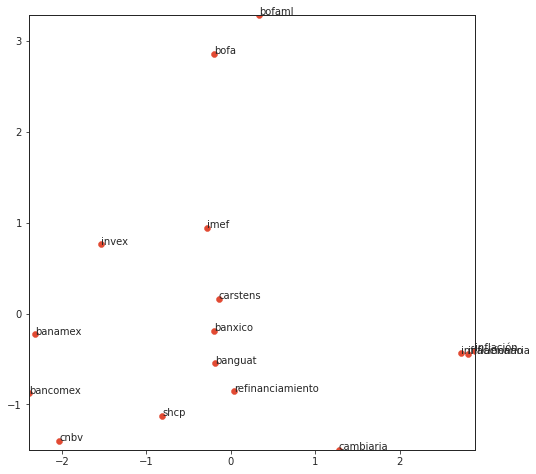

In [83]:
## visualizar con PCA
plt.figure(figsize=(8,8))
plot_sim_words(wordvectors,word,15)

### Aritmética de embeddings para capturar analogías: 
### `hombre es a rey como mujer es a ......`

### king - man = queen - woman
### queen $\approx$ king - man + woman

In [84]:
wordvectors.most_similar(positive=['rey','mujer'],negative=['hombre'])

[('reina', 0.6306586861610413),
 ('infanta', 0.5454355478286743),
 ('princesa', 0.5346059799194336),
 ('berenguela', 0.5296739935874939),
 ('consorte', 0.5245281457901001),
 ('regente', 0.5192065238952637),
 ('monarca', 0.5124677419662476),
 ('ranavalona', 0.4996439218521118),
 ('emperatriz', 0.49612757563591003),
 ('anjesenpaatón', 0.4857787489891052)]

casa - hombre = X - mujer

"X" aprox casa - hombre + mujer

In [85]:
wordvectors.most_similar_cosmul(positive=['casa','mujer'],negative=['hombre'])

[('wimzie', 0.8208423852920532),
 ('casita', 0.8205015659332275),
 ('abuela', 0.8178000450134277),
 ('solariega', 0.8130972385406494),
 ('mansión', 0.8062207102775574),
 ('casona', 0.8048673272132874),
 ('abuelastra', 0.8039239048957825),
 ('suegra', 0.8032931089401245),
 ('realquilada', 0.8000562191009521),
 ('tía', 0.7976456880569458)]

"X" aprox casa-mujer + hombre

In [86]:
wordvectors.most_similar_cosmul(positive=['casa','hombre'],negative=['mujer'])

[('mansión', 0.8917081356048584),
 ('dueño', 0.8717513680458069),
 ('terrado', 0.8662133812904358),
 ('guarida', 0.8657175302505493),
 ('apartamento', 0.8623498678207397),
 ('caserón', 0.8612394332885742),
 ('casita', 0.8607402443885803),
 ('casas', 0.8567700982093811),
 ('duendecito', 0.8535193204879761),
 ('patio', 0.8532143831253052)]

Italia es a Roma como Francia es a...

Francia - Italia = X - Roma

In [87]:
wordvectors.most_similar_cosmul(positive=['francia', 'roma'],negative=['italia'])

[('parís', 0.9015266299247742),
 ('marsella', 0.867093563079834),
 ('aviñón', 0.8584528565406799),
 ('burdeos', 0.8472610116004944),
 ('montpellier', 0.8434250950813293),
 ('lyon', 0.8415652513504028),
 ('versalles', 0.8248647451400757),
 ('rennes', 0.824013888835907),
 ('avignon', 0.8227346539497375),
 ('poitiers', 0.8194709420204163)]

México es a tacos como Italia es a...

Italia - Mexico = X - tacos

In [88]:
wordvectors.most_similar_cosmul(positive=['italia', 'tacos'],negative=['mexico'])

[('fettuccini', 0.9226816296577454),
 ('mozzarella', 0.9207503199577332),
 ('tortelli', 0.9037573933601379),
 ('espaguetis', 0.9031432867050171),
 ('mozzarela', 0.9022800326347351),
 ('macarrones', 0.8967775106430054),
 ('mortadela', 0.892761766910553),
 ('tortellini', 0.8900210857391357),
 ('salchichones', 0.8874748945236206),
 ('salchichonería', 0.8868390917778015)]

## Document embeddings y una aplicación muy simple para tareas de aprendizaje

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import my_functions
from my_functions import *

t_data = pd.read_csv('../data/spanish_reviews/reviews_text_caract.csv', header=0)
t_data

,file,categoria,sentimiento
0,coches_no_1_11.txt,coches,no
1,coches_no_1_13.txt,coches,no
2,coches_no_1_15.txt,coches,no
3,coches_no_1_18.txt,coches,no
4,coches_no_1_19.txt,coches,no
...,...,...,...
395,peliculas_yes_5_23.txt,peliculas,yes
396,peliculas_yes_5_4.txt,peliculas,yes
397,peliculas_yes_5_5.txt,peliculas,yes
398,peliculas_yes_5_7.txt,peliculas,yes


In [90]:
dir_data = '../data/spanish_reviews/all_files/'
# leer y preprocesar textos
preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True, 
                                _remueveStop=True, _stemming=False)

files_txt = dir_data+t_data['file']
files_txt = files_txt.tolist()

corpus = []
for f in files_txt:
    file = open(f, 'r', encoding='latin-1')
    txt = file.read()
    txt_prep = preprocesador.preprocesa(txt)
    corpus.append(txt_prep)

y1 = t_data['categoria'].astype('category').cat.codes
y2 = t_data['sentimiento'].astype('category').cat.codes

In [99]:
def frase_a_vec(frase, modelo_wv):
    N = 0
    acc = np.zeros(modelo_wv.vector_size)
    for palabra in frase:
        if palabra in modelo_wv.vocab:
            acc += modelo_wv[palabra]
            N += 1
    return acc if N==0 else acc/N

def sentencias_a_vec(frases, modelo_wv):
    vectores = np.zeros((len(frases), modelo_wv.vector_size))
    for (i, frase) in enumerate(frases):
        vectores[i,:] = frase_a_vec(frase, modelo_wv)
    return vectores

In [92]:
wordvectors.vector_size

300

In [124]:
docs_vec = np.zeros((len(corpus), wordvectors.vector_size))

for (i, txt) in enumerate(corpus):
    tokens = word_tokenize(txt)
    docs_vec[i,:] = frase_a_vec(tokens, wordvectors)

In [125]:
docs_vec.shape

(400, 300)

In [132]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

X = StandardScaler().fit_transform(docs_vec)
pca = PCA(n_components=5)
docs_pca = pca.fit_transform(X)
proj = pd.DataFrame(docs_pca,columns = ['pc1','pc2','pc3','pc4','pc5'])

proj_docs = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'pc3': proj['pc3'], 'topico': t_data['categoria'],
                       'sentimiento':t_data['sentimiento']})

fig = px.scatter(proj_docs, x='pc1', y='pc2', hover_data=['sentimiento'], color = 'topico')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Support vector classifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(docs_vec, y2, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.81      0.67        36
           1       0.76      0.50      0.60        44

    accuracy                           0.64        80
   macro avg       0.66      0.65      0.63        80
weighted avg       0.67      0.64      0.63        80



In [134]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', C=15)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71        36
           1       0.78      0.66      0.72        44

    accuracy                           0.71        80
   macro avg       0.72      0.72      0.71        80
weighted avg       0.72      0.71      0.71        80



              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       0.88      1.00      0.93         7
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         5
           7       1.00      0.92      0.96        13

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



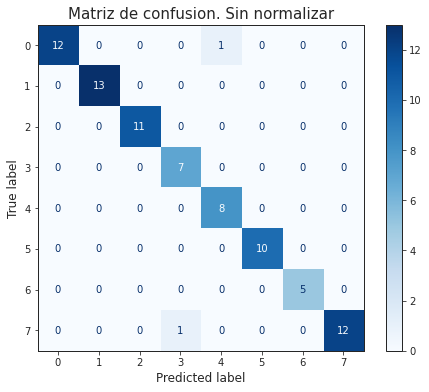

In [135]:
X_train, X_test, y_train, y_test = train_test_split(docs_vec, y1, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Blues, normalize = None)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       0.88      1.00      0.93         7
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         5
           7       1.00      0.92      0.96        13

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



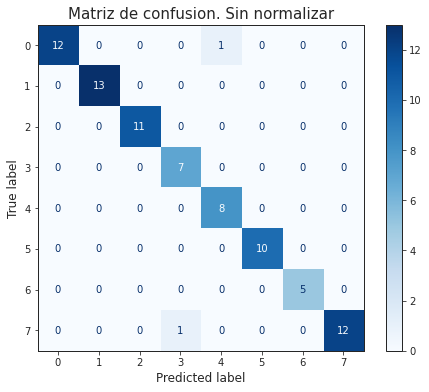

In [136]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', C=15, multi_class='ovr')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred
print(metrics.classification_report(y_test, y_pred))

plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize = None)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()